# ## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing librariens
#### 2. The elbow technique
#### 3. k-means clustering

# 1. Importing libraries 

In [55]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScalerA
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl 

In [57]:
# Load data
data_cleaned=pd.read_csv(r'C:\Users\marci\Achievement 6\01Data\Prepared Data\data_cleaned.csv')


In [59]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [61]:
data_cleaned.shape

(12371, 21)

In [12]:
data_cleaned.head()

,Unnamed: 0,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,UNSD Geographical Grouping,Latitude,Longitude
0,0,Incident,2014,January,Central America,North America,Guatemala,1,0,1,...,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,31.650259,-110.366453
1,1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1,0,1,...,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,31.59713,-111.73756
2,2,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1,0,1,...,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,31.94026,-113.01125
3,3,Incident,2014,January,Central America,North America,Mexico,1,0,1,...,0,1,0,Violence,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",Northern America,31.506777,-109.315632
4,4,Incident,2014,January,Northern Africa,Europe,Sudan,1,0,1,...,0,1,0,Harsh environmental conditions / lack of adequ...,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),Northern Europe,59.1551,28.0


In [63]:
data_cleaned = data_cleaned.drop(columns=['Unnamed: 0'])

In [81]:
data_cleaned.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'UNSD Geographical Grouping', 'Latitude',
       'Longitude', 'Cluster'],
      dtype='object')

In [41]:
data_cleaned.head()

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,UNSD Geographical Grouping,Latitude,Longitude
0,Incident,2014,January,Central America,North America,Guatemala,1,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,31.650259,-110.366453
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,31.59713,-111.73756
2,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,31.94026,-113.01125
3,Incident,2014,January,Central America,North America,Mexico,1,0,1,0,0,1,0,Violence,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",Northern America,31.506777,-109.315632
4,Incident,2014,January,Northern Africa,Europe,Sudan,1,0,1,2,0,1,0,Harsh environmental conditions / lack of adequ...,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),Northern Europe,59.1551,28.0


In [69]:
### Drop non-numeric columnsdf_numeric=data_cleaned.select_dtypes(include=[np.number])

In [71]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

### 2. The elbow technique

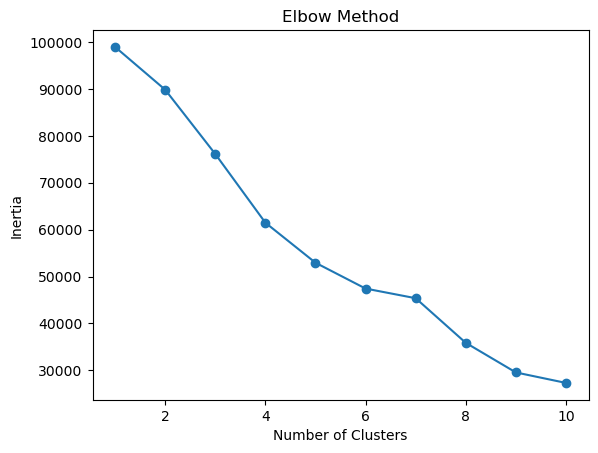

In [73]:
# Determine the optimal number of clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

 # Run K-Means Algorithm

In [105]:
# Using 3 chosen number of clusters 
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add clusters to DataFrame
df_numeric['Cluster'] = clusters

### Create Visualizations

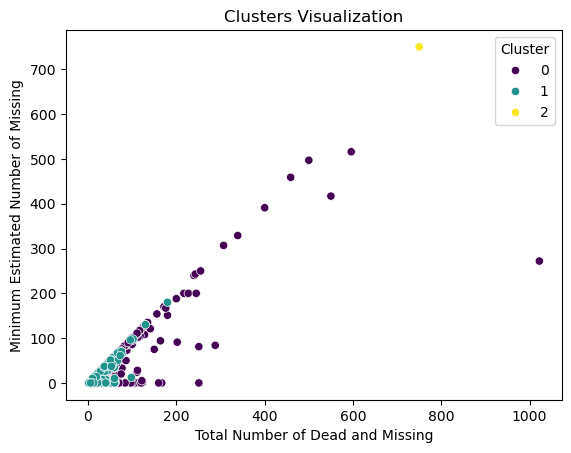

In [107]:
# Example scatter plot
sns.scatterplot(x='Total Number of Dead and Missing', y='Minimum Estimated Number of Missing', hue='Cluster', data=df_numeric, palette='viridis')
plt.title('Clusters Visualization')
plt.show()

# Observations on Clustering:
Cluster Differentiation:

# Cluster 0 (Purple): 
    Contains a wide range of values, including in this cincludes the incident with an unknown/mixed cause, reflecting variability in incident types and severities.
# Cluster 1 (Cyan): 
    Most incidents with moderate or lower numbers fall here, suggesting a more common, lower-severity grouping.
# Cluster 2 (Yellow): 
    A few distinct points, contains the drowning incident with exceptionally high numbers of Dead and Missing, making it stand out as a extreme case.The clustering helps to discern events of significant impact, like drownings, from more typical or less deadly scenarios.





In [109]:
# Calculate stats for clusters
cluster_stats = df_numeric.groupby('Cluster').mean()
print(cluster_stats)

         Incident year  Number of Dead  Minimum Estimated Number of Missing  \
Cluster                                                                       
0          2017.216982        3.042314                             2.378117   
1          2021.395066        1.962811                             1.358251   
2          2014.000000        0.000000                           750.000000   

         Total Number of Dead and Missing  Number of Survivors  \
Cluster                                                          
0                                5.420430             7.497507   
1                                3.321061             6.061671   
2                              750.000000             0.000000   

         Number of Females  Number of Males  Number of Children  
Cluster                                                          
0                 0.627297         1.031771            0.266135  
1                 0.281069         1.252663            0.174547  
2        

## Cluster 0:
    Incident Year: Average around 2017.
    Severity: Moderate "Number of Dead" and "Missing," suggesting a mix of incidents.
    Survivors: Average of about 7.5 survivors, indicating less severe incidents.
# Cluster 1:
    Incident Year: More recent, averaging around 2021.
    Severity: Lower average "Number of Dead" and "Missing," suggesting less severe or more common events.
    Survivors: Similar to Cluster 0, possibly indicating effective responses.
# Cluster 2:
    Incident Year: All in 2014, indicating a specific event or anomaly.
    Severity: Extremely high "Missing" numbers and no survivors, highlighting a significant event or data anomaly.
    Insights:
    Temporal Changes: Cluster 1 shows more recent incidents, potentially reflecting improvements in response or reporting.
    Severity Differences: Cluster 2 indicates severe anomalies needing focused investigation or intervention.
    Demographics: Variable numbers of males, females, and children provide further insight into incident impacts and demographic vulnerabilities.

# Usefulness:    
Decision-Making: Understanding cluster differences aids in resource allocation and policy development.    
Further Analysis: Provides a basis for deep-diving into specific clusters to uncover causes or patterns.